# Organización de Datos
## Trabajo Práctico Número 1
### Grupo: L3M
#### Integrantes
1. Gastón Sanchez
2. Diego Durante
3. Juan Rabadan

## Configuración Inicial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs
pd.set_option('display.max_columns', 55)

import warnings
warnings.filterwarnings('ignore')

## Columnas del Dataframe

| **Nombre**    | **Descripción**  | **DType**     | CASTED TO    | 
| :--| :-- | :-- | :-- |
| **ID**             | id único del registro |int64 |- |
| **Región** | región de la oportunidad |object |category |
| **Territory** | territorio comercial de la oportunidad |object |category |
| **Pricing, Delivery_Terms_Quote_Approval** | variable que denomina si la oportunidad necesita aprobación especial de su precio total y los términos de la entrega |int64 |- |
| **Pricing, Delivery_Terms_Approved** | variable que denomina si la oportunidad obtuvo aprobación especial de su precio total y los términos de la entrega |int64 |- |
| **Bureaucratic_Code_0_Approval** | variable que denomina si la oportunidad necesita el código burocrático 0 |int64 |- |
| **Bureaucratic_Code_0_Approved** | variable que denomina si la oportunidad obtuvo el código burocrático 0 |int64 |- |
| **Submitted_for_Approval** | variable que denomina si fue entregada la oportunidad para la aprobación |int64 |- |
| **Bureaucratic_Code** | códigos burocráticos que obtuvo la oportunidad |object |category |
| **Account_Created_Date** | fecha de creación de la cuenta del cliente |object |datetime64[ns] |
| **Source** | fuente de creación de la oportunidad |object |category |
| **Billing_Country** | país donde se emite la factura |object |category |
| **Account_Name** | nombre de la cuenta del cliente |object |category |
| **Opportunity_Name** | nombre de la oportunidad |object |category |
| **Opportunity_ID** | id de la oportunidad |int64|- |
| **Sales_Contract_No** | número de contrato |object |int64 |
| **Account_Owner** | vendedor del equipo comercial responsable de la cuenta cliente |object |category |
| **Opportunity_Owner** | vendedor del equipo comercial responsable de la oportunidad comercial |object |category |
| **Account_Type** | tipo de cuenta cliente |object |category |
| **Opportunity_Type** | tipo de oportunidad |object |category |
| **Quote_Type** | tipo de presupuesto |object |category |
| **Delivery_Terms** | términos de entrega |object |category |
| **Opportunity_Created_Date** | fecha de creación de la oportunidad comercial |object |datetime64[ns] |
| **Brand** | marca del producto |object |category |
| **Product_Type** | tipo de producto |object |category |
| **Size** | tamaño del producto |object |category |
| **Product_Category_B** | categoría 'B' del producto |object |category |
| **Price** | precio | - |Decimal |
| **Currency** | moneda |object |category |
| **Last_Activity** | fecha de la última actividad |object |datetime64[ns] |
| **Quote_Expiry_Date** | fecha de vencimiento del presupuesto |object |datetime64[ns] |
| **Last_Modified_Date** | fecha de ultima modificación en la oportunidad |object |datetime64[ns] |
| **Last_Modified_By** | usuario responsable de la última modificación en la oportunidad |object |category |
| **Product_Family** | familia de producto |object |category |
| **Product_Name** | nombre del producto |object |category |
| **ASP_Currency** | moneda del precio promedio |object |category |
| **ASP** | (Average Selling Price) precio promedio a la venta |float64 |- |
| **ASP_(converted)_Currency** | moneda del precio promedio convertido en la variable |object |category |
| **ASP_(converted)** | precio promedio a la venta convertido a otra moneda |float64 |- |
| **Planned_Delivery_Start_Date** | límite inferior del rango previsto para la fecha de entrega |object |datetime64[ns] |
| **Planned_Delivery_End_Date** | límite superior del rango previsto para la fecha de entrega |object |datetime64[ns] |
| **Month** | mes-año de Planned_Delivery_Start_Date | - |Fecha |
| **Delivery_Quarter** | trimestre de Planned_Delivery_Start_Date |object |category |
| **Delivery_Year** | año de Planned_Delivery_Start_Date |object |- |
| **Actual_Delivery_Date** | fecha real de la entrega |object |datetime64[ns] |
| **TRF** | Toneladas de refrigeración |int64|- |
| **Total_Amount_Currency** | moneda del monto total |object |?? |
| **Total_Amount** | monto total |float64 |- |
| **Total_Taxable_Amount_Currency** | moneda del monto gravado total |object |category |
| **Total_Taxable_Amount** | monto gravado total |float64 |-|
| **Stage** | variable target. Estado de la oportunidad |object |category |
| **Prod_Category_A** | categoría 'A' del producto |object |category |
| **Total_Power_Discreet** | categorización de la variable Total Power en bins |object |category |



In [2]:
# Leemos el archivo csv y convertimos ciertas columnas a tipos de datos más eficientes.
# Numpy data types https://numpy.org/doc/stable/user/basics.types.html

df = pd.read_csv('data/Entrenamieto_ECI_2020.csv', 
                dtype={
                    'Region': 'category', 
                    'Territory': 'category',
                    'Bureaucratic_Code': 'category',
                    'Source ': 'category',
                    'Billing_Country': 'category',
                    'Account_Name': 'category',
                    'Opportunity_Name': 'category',
                    'Account_Owner': 'category',
                    'Opportunity_Owner': 'category', 
                    'Account_Type': 'category', 
                    'Opportunity_Type': 'category',     
                    'Quote_Type': 'category', 
                    'Delivery_Terms': 'category',
                    'Brand': 'category',
                    'Product_Type': 'category',
                    'Size': 'category',
                    'Product_Category_B': 'category',    
                    'Currency': 'category',
                    'Last_Modified_By': 'category',    
                    'Product_Family': 'category',    
                    'Product_Name': 'category',
                    'ASP_Currency': 'category',    
                    'ASP_(converted)_Currency': 'category',    
                    'Delivery_Quarter': 'category',    
                    'Total_Taxable_Amount_Currency': 'category',
                    'Total_Amount_Currency': 'category',
                    'Stage': 'category',
                    'Pricing, Delivery_Terms_Quote_Appr': np.bool_,
                    'Pricing, Delivery_Terms_Approved': np.bool_,
                    'Bureaucratic_Code_0_Approval': np.bool_,
                    'Bureaucratic_Code_0_Approved': np.bool_,
                    'Submitted_for_Approval': np.bool_,
                    'Delivery_Year': np.int8,
                },
                parse_dates=[
                    'Account_Created_Date',
                    'Opportunity_Created_Date',
                    'Quote_Expiry_Date',
                    'Last_Modified_Date',
                    'Planned_Delivery_Start_Date',
                    'Planned_Delivery_End_Date'],
                infer_datetime_format=True)

# Convertimos Sales_Contract_No al tipo de datos numerico
df['Sales_Contract_No'] = pd.to_numeric(df['Sales_Contract_No'], errors='coerce')

# Renombramos algunas columnas
df.rename({'Source ': 'Source', 
           'Pricing, Delivery_Terms_Quote_Appr': 'Approval_Required',
           'Pricing, Delivery_Terms_Approved': 'Approval_Ok',
           'Bureaucratic_Code_0_Approval': 'BC0_Required',
           'Bureaucratic_Code_0_Approved': 'BC0_Ok',
          },  
          axis = "columns", inplace = True)

# Se reemplazan los nan con 0 en las siguientes columnas numéricas ASP y ASP_(converted)
df['ASP'] = df['ASP'].fillna(0)
df['ASP_(converted)'] = df['ASP_(converted)'].fillna(0)

In [3]:
# Tamaño del DataFrame (16947 files x 52 columnas)
df.shape

(16947, 52)

In [4]:
# Revisamos algunas columnas en donde faltan valores.
# df['Brand'].value_counts(normalize=True) 94% None / 4% Other
# df['Price'].value_counts(normalize=True) 94% None / 4% Other
# df['Product_Category_B'].value_counts(normalize=True) 94% None / 3% Other
# df['Source'].value_counts(normalize=True) 56% None
# df['Sales_Contract_No'].isnull().value_counts(normalize=True) 59% None 41% Dato


# df['Stage'].value_counts()
# Closed Won       9533
# Closed Lost      7350
# Proposal           35
# Negotiation        18
# Qualification      11

## Conversión de precios a una misma moneda
> El objetivo buscado es poder pasar los importes totales de las oportunidades a una misma moneda. Se utilizará como moneda común los dólares americanos USD. Para ello, se intentará construir una columna de tipo de cambio (Exchange_Rate) que nos permita convertir de la moneda de origen a la moneda de destino (USD). En caso que tanto la moneda de origen como la de destino sean USD, el tipo de cambio tendrá un valor de 1.00. 
Luego de tener generada la columna tipo de cambio, la idea es agrupar por Opportunity_ID, sumar Total_Amount y multiplicar por el Exchange_Rate. Con esto lograríamos que todos los Total_Taxable_Amount de las oportunidades estén expresados en un misma moneda y que puedan ser comparables.

In [5]:
# A modo de ejemplo, se muestran a continuación, dos Oportunidades que incluyen cada una de ellas, más de una fila. IDs 8 y 9
# Por simplicidad solo se mostrarán los datos de algunas columnas relevantes.
df.loc[df.Opportunity_ID.isin([8,9]) ,['Opportunity_ID','ASP', 'ASP_(converted)', 'Total_Amount', 'Total_Taxable_Amount']].set_index('Opportunity_ID')

,ASP,ASP_(converted),Total_Amount,Total_Taxable_Amount
Opportunity_ID,,,,
8,0.00,0.00,"15,600.00","470,400.00"
8,0.00,0.00,"4,400.00","470,400.00"
8,0.00,0.00,"6,200.00","470,400.00"
8,0.00,0.00,"140,000.00","470,400.00"
8,78.00,0.70,"304,200.00","470,400.00"
9,0.00,0.00,"23,400.00","559,320.00"
9,0.00,0.00,"4,400.00","559,320.00"
9,0.00,0.00,"6,200.00","559,320.00"
9,0.00,0.00,"140,000.00","559,320.00"


In [6]:
# Como se puede ver en el ouput anterior, solo 1 fila de cada una de estas oportunidades tiene valores distintos a 0. 
# Por lo cual, se agrupará por Opportunity_ID, utilizando *max* como funcion de agregado y luego así poder calcular correctamente 
# la columna de Exchange_Rate.

In [7]:
# La columna ASP representa el precio promedio a la venta en la moneda del pais de billing, 
# la columna ASP_(converted) representa lo mismo pero en dólares americanos. El cociente entre ambas columnas 
# ASP_(converted) / ASP nos permitirá obtener un tipo de cambio para convertir a dolares todos los importes de Total Taxable A

# Agrupo por Opportunity_ID, utilizo *max* como función de agregado para quedarme con los valores máximos de ASP y ASP_(Converted). 
# Estas dos columnas, cuando la Oportunidad cuenta con más de un fila, están en nan, excepto la última fila.  
df_asp_grouped = df.groupby('Opportunity_ID').agg('max').loc[:,['ASP', 'ASP_(converted)']]
df_asp_grouped['Exchange_Rate'] = df_asp_grouped['ASP_(converted)'] / df_asp_grouped['ASP']

In [8]:
df_null_asp_ids = df_asp_grouped.loc[df_asp_grouped['ASP'] == 0,:].index

In [9]:
df_null_asp_ids

Int64Index([   41,   105,   211,   214,   246,   249,   251,   331,   368,
              437,
            ...
            12473, 12475, 12477, 12486, 12514, 12520, 12659, 12673, 12685,
            12704],
           dtype='int64', name='Opportunity_ID', length=164)

In [10]:
# La siguiente operación, nos mostrará aquellas oportunidades en donde la columna ASP tiene como valor 0, 
# con lo cual hace que el tipo de cambio resultante tienda a infinito.
df_to_fix = df.loc[(df.Opportunity_ID.isin(df_null_asp_ids)), ['Opportunity_ID','Billing_Country','ASP','ASP_(converted)','Total_Amount', 'Total_Taxable_Amount','Stage']]

In [11]:
# Para los anteriores registros hay que pensar como completar esos valores, o bien descartarlos de la muestra.

In [12]:
df.columns

Index(['ID', 'Region', 'Territory', 'Approval_Required', 'Approval_Ok',
       'BC0_Required', 'BC0_Ok', 'Submitted_for_Approval', 'Bureaucratic_Code',
       'Account_Created_Date', 'Source', 'Billing_Country', 'Account_Name',
       'Opportunity_Name', 'Opportunity_ID', 'Sales_Contract_No',
       'Account_Owner', 'Opportunity_Owner', 'Account_Type',
       'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currency', 'Total_Amount',
       'Total_Taxable_Amount_Currency', 'Total_Taxable_Amount', 

In [13]:
df_asp_grouped

,ASP,ASP_(converted),Exchange_Rate
Opportunity_ID,,,
0,0.52,0.59,1.13
1,0.53,0.60,1.13
2,0.48,0.48,1.00
3,0.53,0.53,1.00
4,0.53,0.53,1.00
...,...,...,...
12799,0.52,0.58,1.13
12800,0.53,0.53,1.00
12801,0.52,0.59,1.13


In [14]:
df_asp_grouped.rename({'ASP': 'Foreign_Currency', 
           'ASP_(converted)': 'USD_Currency',
          },  
          axis = "columns", inplace = True) 

In [15]:
df_merged = df.merge(df_asp_grouped, left_on='Opportunity_ID', right_on='Opportunity_ID')

In [16]:
df_merged.loc[:,['Opportunity_ID','Billing_Country','ASP','Foreign_Currency','ASP_(converted)','USD_Currency','Total_Amount', 'Total_Taxable_Amount','Exchange_Rate','Stage']]

,Opportunity_ID,Billing_Country,ASP,Foreign_Currency,ASP_(converted),USD_Currency,Total_Amount,Total_Taxable_Amount,Exchange_Rate,Stage
0,0,Netherlands,0.52,0.52,0.59,0.59,"5,272,800.00","5,272,800.00",1.13,Closed Lost
1,1,Netherlands,0.53,0.53,0.60,0.60,"48,230.00","48,230.00",1.13,Closed Won
2,2,United States,0.48,0.48,0.48,0.48,"83,865.60","83,865.60",1.00,Closed Won
3,3,United States,0.53,0.53,0.53,0.53,"7,421,881.50","7,421,881.50",1.00,Closed Lost
4,4,United States,0.53,0.53,0.53,0.53,"13,357,192.50","13,357,192.50",1.00,Closed Lost
...,...,...,...,...,...,...,...,...,...,...
16942,12801,Austria,0.52,0.52,0.59,0.59,"103,350.00","299,715.00",1.13,Closed Won
16943,12801,Austria,0.52,0.52,0.59,0.59,"93,015.00","299,715.00",1.13,Closed Won
16944,12801,Austria,0.52,0.52,0.59,0.59,"103,350.00","299,715.00",1.13,Closed Won
16945,12802,United States,0.64,0.64,0.64,0.64,"2,346,796.88",0.00,1.00,Closed Lost


In [17]:
df_merged.loc[df_merged['Foreign_Currency']==0,['Opportunity_ID','Billing_Country','ASP','Foreign_Currency','ASP_(converted)','USD_Currency','Total_Amount', 'Total_Taxable_Amount','Exchange_Rate','Stage']]

,Opportunity_ID,Billing_Country,ASP,Foreign_Currency,ASP_(converted),USD_Currency,Total_Amount,Total_Taxable_Amount,Exchange_Rate,Stage
110,41,Japan,0.00,0.00,0.00,0.00,"20,280.00","20,280.00",nan,Closed Lost
196,105,Japan,0.00,0.00,0.00,0.00,"34,000.00","390,050.00",nan,Closed Won
197,105,Japan,0.00,0.00,0.00,0.00,"26,000.00","390,050.00",nan,Closed Won
198,105,Japan,0.00,0.00,0.00,0.00,"1,200.00","390,050.00",nan,Closed Won
199,105,Japan,0.00,0.00,0.00,0.00,"6,200.00","390,050.00",nan,Closed Won
...,...,...,...,...,...,...,...,...,...,...
16348,12520,France,0.00,0.00,0.00,0.00,0.00,0.00,nan,Closed Lost
16659,12659,France,0.00,0.00,0.00,0.00,0.00,0.00,nan,Closed Lost
16684,12673,United States,0.00,0.00,0.00,0.00,"3,380,000.00","3,380,000.00",nan,Closed Lost
16701,12685,Thailand,0.00,0.00,0.00,0.00,"119,067.90","119,067.90",nan,Closed Lost


In [18]:
df_merged.shape

(16947, 55)

In [19]:
df.head()

,ID,Region,Territory,Approval_Required,Approval_Ok,BC0_Required,BC0_Ok,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,True,True,True,True,False,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,nan,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-30,2016-06-13,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.59,2016-05-01,2016-06-30,2016 - 5,Q2,-32,NaT,10,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,False,False,False,False,False,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39.00,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-20,2016-01-15,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.60,2016-01-18,2016-01-20,2016 - 1,Q1,-32,NaT,0,EUR,"48,230.00",EUR,"48,230.00",Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,False,False,False,False,False,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760.00,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,NaT,2016-09-30,2016-09-29,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48,2016-01-25,2016-01-25,2016 - 1,Q1,-32,NaT,0,USD,"83,865.60",USD,"83,865.60",Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,True,False,True,False,False,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,nan,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53,2018-02-01,2018-03-31,2018 - 2,Q1,-30,NaT,14,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,True,False,True,False,False,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,nan,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2017-06-02,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53,2018-02-01,2018-02-28,2018 - 2,Q1,-30,NaT,25,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost,Prod_Category_A_None


In [20]:
df_common = df.loc[:, ['Opportunity_ID','Stage']]

In [21]:
df.loc[df['Opportunity_ID']==0,['Opportunity_ID','Region', 'Territory', 'Source']]

,Opportunity_ID,Region,Territory,Source
0,0,EMEA,None,None


In [22]:
df_common.groupby(by=['Opportunity_ID', 'Stage'], axis=0).agg({'Opportunity_ID': ['count']})

Opportunity_ID
                                      count
Opportunity_ID Stage                       
0              Closed Lost                1
               Closed Won                 0
               Negotiation                0
               Proposal                   0
               Qualification              0
...                                     ...
12803          Closed Lost                1
               Closed Won                 0
               Negotiation                0
               Proposal                   0
               Qualification              0

[49205 rows x 1 columns]

In [24]:
stage_by_regions = df[['Region', 'Stage']]

In [53]:
aaa = stage_by_regions.groupby(['Region','Stage']).agg({'Stage': ['count']}).reset_index()
aaa.columns = ('Region', 'Stage', 'Opportunity')
aaa

,Region,Stage,Opportunity
0,APAC,Closed Lost,1355
1,APAC,Closed Won,1896
2,APAC,Negotiation,0
3,APAC,Proposal,8
4,APAC,Qualification,3
5,Americas,Closed Lost,2140
6,Americas,Closed Won,1793
7,Americas,Negotiation,8
8,Americas,Proposal,4
9,Americas,Qualification,0


In [72]:
bbb = aaa.pivot(index='Region', columns='Stage', values='Opportunity')
bbb

Stage,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Region,,,,,
APAC,1355,1896,0,8,3
Americas,2140,1793,8,4,0
EMEA,2189,2471,1,3,0
Japan,1546,3323,1,14,8
Middle East,120,50,8,6,0


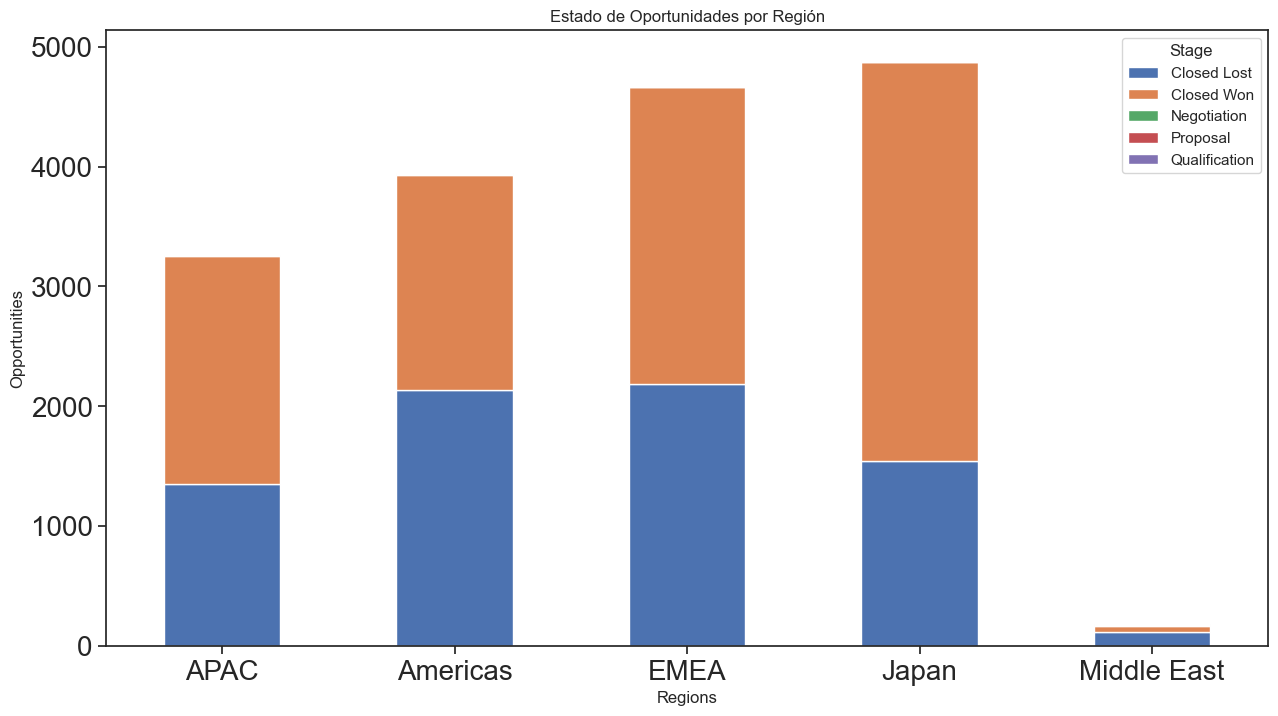

In [79]:
sns.set_style("ticks")
bbb.plot(kind='bar', figsize=(15,8), sort_columns=True, fontsize=20, rot= 360, stacked=True)
plt.xlabel('Regions')
plt.ylabel('Opportunities')
plt.title('Estado de Oportunidades por Región')
plt.show()